## 1. Importing and Preparing Data with Pandas

Data preparation is an important step before any analysis of the data. This includes:
- Importing the data form various sources (Excel files, Web Scraping, etc.)
- Cleaning up the data (removing any NA's, deleting extra rows/columns not needed
- Aggregating multiple sources (merging or concatenating tables)
- Any sorting or filtering of data

<font color = 'blue'> **Import Packages and File** </font>

There are several ways to import Excel files using Pandas:
- Loading a CSV file using read_csv or Excel file using read_excel
- The path of the file can be given in "absolute" or "relative" terms to your project directory.

Below is an example of loading the file using the absolute path.

In [2]:
import pandas as pd
#newDF = pd.read_excel(r'C:\Users\guido\Desktop\Python Class\Excel\Data Manipulation Worksheet.xlsx', sheet_name='Financing Table')

Below is the alternative way using relative path (note, only one of these lines of codes actually needs to be run). Before running the code below, ensure there is an "ExData" folder in the same project folder as this Jupyter file.

In [4]:
newDF = pd.read_excel('../ExData/Data Manipulation Worksheet.xlsx', sheet_name='Financing Table')

<font color = 'blue'> **Check and Clean Data** </font>
- Using **df.shape** can quickly tell us the # of rows and columns in our data set
    - In example below, it is stating we have 568 rows of data
- Using **df.head()** can help us see the first 5 rows of data
    - A value can be given in brackets to show more rows (e.g. head(10) will show first 10 rows) 
- Another useful method is **df.info()** which will list all the column headers, along with how many data points we have in each column, and what type of data (integers, decimals, text, etc.)

***
**Note:** df is short fo DataFrame, and it's a placeholder for the name given to our loaded tables. 
***

In [5]:
#Changes formatting of outputed floats (#s with decimals) to show with 2 decmials and thousands separator
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
print(newDF.shape)
newDF.head() #looks good

(568, 6)


,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
0,2006-01-28,US Bank N.A.,Global Notes,"1,000.21",Finance,Lehman Brothers
1,2006-01-28,Alliance National Muni Income Fund,Initial Public Offering,283.60,Finance,Salomon Smith Barney
2,2006-01-28,Lloyds Bank Plc NY,CD Notes,200.58,Finance,Merrill Lynch
3,2006-01-28,FBR Asset Investment Corp,Equity Follow-On Offering,127.20,Real Estate,"Friedman, Billings, Ramsey"
4,2006-01-28,Alliance California Muni Income Fund,Initial Public Offering,117.10,Finance,Salomon Smith Barney


In [7]:
#however when we try info says object for size
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            564 non-null    object        
 2   TYPE              558 non-null    object        
 3   SIZE              558 non-null    object        
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 26.8+ KB


Some key takeaways:
- Most columns have 557 data points, however Issuer, Type, Size, have 558
- Date column is being treated as "datetime64" type; this means Python is correctly treated the values as dates
- However, the Size column should be all numbers, but the values are being treated as object (which in this case is string or text)

Another useful method to quickly check the data set is **df.tail()** which will print the last 5 rows by default (can also be given a number in brackets for more rows).

In [8]:
newDF.tail(15)

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
553,2006-06-21,Sears Roebuck Acceptance Corp,Sr Notes,250.10,Finance,Merrill Lynch
554,2006-06-21,DQE Inc,Equity Follow-On Offering,202.50,Utility,Lehman Brothers
555,2006-06-21,MassMutual,Global Notes,200.10,Finance,Morgan Stanley
556,2006-06-21,Conceptus Inc,Equity Follow-On Offering,72,Healthcare,UBS Warburg
557,NaT,NaN,NaN,NaN,NaN,NaN
558,NaT,NaN,NaN,NaN,NaN,NaN
559,NaT,NaN,NaN,NaN,NaN,NaN
560,NaT,NaN,NaN,NaN,NaN,NaN
561,NaT,ISSUER,LEAD UNDERWRITER,SIZE,NaN,NaN
562,NaT,Linens 'n Things Inc,NaN,NaN,NaN,NaN


- It looks like after row 556, there are some blank rows, and then a "summary table" at the bottom
- Python thinks this is part of the data set when it originally imported the table
- We need to get rid of these extra rows at the bottom

In [9]:
finTable = newDF.dropna()
finTable.tail()
pd.to_numeric(finTable['SIZE'])
finTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 556
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            557 non-null    object        
 2   TYPE              557 non-null    object        
 3   SIZE              557 non-null    object        
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 30.5+ KB


In [10]:
finTable['SIZE'] = pd.to_numeric(finTable['SIZE'])
finTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 556
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            557 non-null    object        
 2   TYPE              557 non-null    object        
 3   SIZE              557 non-null    float64       
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 30.5+ KB


C:\Users\bogda\Anaconda3\envs\bogMarquee\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
#Set the Date column as new index
finTable.set_index(['DATE'], drop=True, inplace=True)
finTable.head()

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-01-28,US Bank N.A.,Global Notes,"1,000.21",Finance,Lehman Brothers
2006-01-28,Alliance National Muni Income Fund,Initial Public Offering,283.60,Finance,Salomon Smith Barney
2006-01-28,Lloyds Bank Plc NY,CD Notes,200.58,Finance,Merrill Lynch
2006-01-28,FBR Asset Investment Corp,Equity Follow-On Offering,127.20,Real Estate,"Friedman, Billings, Ramsey"
2006-01-28,Alliance California Muni Income Fund,Initial Public Offering,117.10,Finance,Salomon Smith Barney


In [12]:
finTable.index.map(lambda x: x.day)

Int64Index([28, 28, 28, 28, 28, 28, 28, 28, 28, 29,
            ...
            19, 19, 19, 20, 20, 21, 21, 21, 21, 21],
           dtype='int64', name='DATE', length=557)

## 2. Visualization and Analysis

Now that the data set is imported and clean we can start visualizing the data set and start summarizing:
- We'll be using matplotlib and seaborn packages
- Can create category count plots to see the count by Type/Industry/Lead Underwriter 
- Histograms of SIZE column to see the distribution of deal sizes
- Box Whisker plots to see distribution, outliers, average, and quartiles
- Filters by different criteria (deals between a certain range of transaction size, deals by a particular underwrite and industry, etc.)
- Can use **groupby** or **pivot_table** to generate summary analysis similar to Pivot Tables in Excel

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

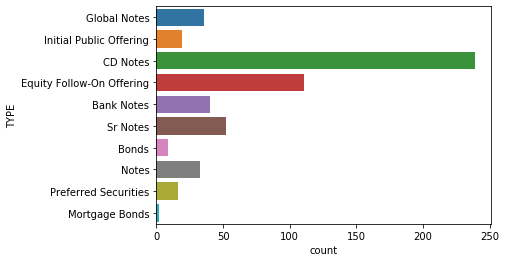

In [14]:
#check num of values in each sectory category
sns.countplot(y='TYPE',data=finTable)
plt.show()

In [15]:
finTable['INDUSTRY'].unique()

array(['Finance', 'Real Estate', 'Computers & Electronics', 'Utility',
       'Healthcare', 'Paper & Packaging', 'Retail', 'Defense Contractors',
       'Leisure & Recreation', 'Machinery', 'Metal & Steel',
       'Food & Beverage', 'Telecommunications', 'Oil & Gas',
       'Consumer Products', 'Insurance', 'Chemicals', 'Transportation',
       'Professional Services', 'Construction/Bldg Prods',
       'Electric Services ', 'Auto/Truck', 'Textile', 'Broadcasting',
       'Foreign Agency'], dtype=object)

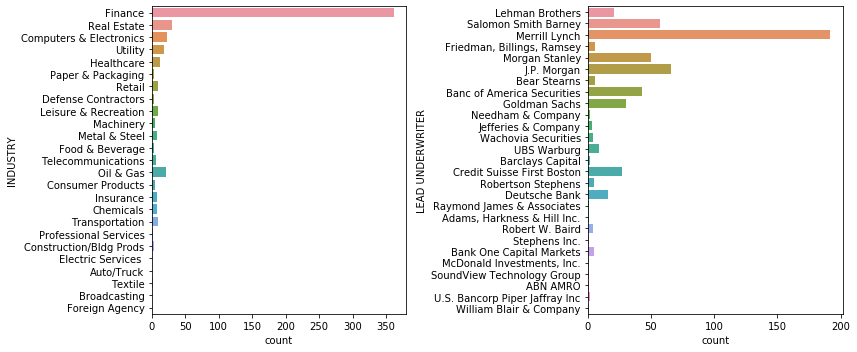

In [16]:
#check num of values in each sectory category
fig, ax =plt.subplots(1,2, figsize=(12,5))
sns.countplot(y='INDUSTRY', data=finTable, ax=ax[0])
sns.countplot(y='LEAD UNDERWRITER', data=finTable, ax=ax[1])
fig.tight_layout()

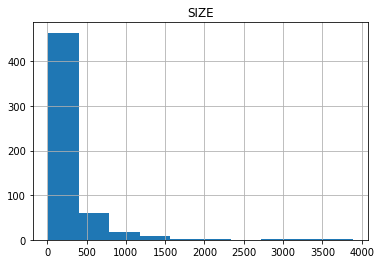

In [17]:
finTable.hist()
plt.show()

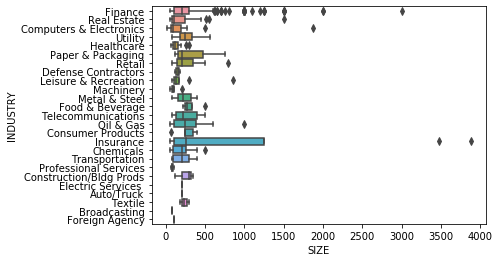

In [18]:
#Box Whisker Plot by Industry
sns.boxplot(y='INDUSTRY', x='SIZE', data=finTable)
plt.show()

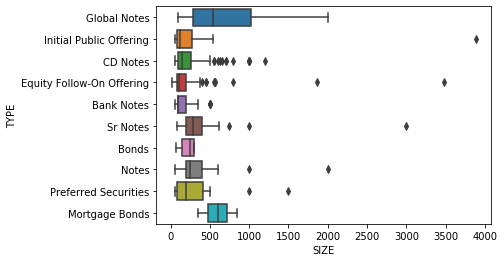

In [19]:
#Box Whisker Plot by Type
sns.boxplot(y='TYPE', x='SIZE', data=finTable)
plt.show()

<font color = 'blue'> **Filtering Data** </font>

The generic way of filtering a table is to use the following structure: dataframe[booleanMask], where the booleanMask is an IF statement type condition that creates True/False values for each row in the table.
- The conditions can be combined using OR vs AND logic (use | for OR, use & for AND)

Below are a couple example of filtering the data.

In [20]:
#deals between 500 and 1000
finTable[(finTable['SIZE'] >= 700) & (finTable['SIZE'] <= 1000)]

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-02-05,Aramark Corporation,Equity Follow-On Offering,793.50,Retail,Goldman Sachs
2006-02-05,Societe Generale-NY,CD Notes,700.14,Finance,Merrill Lynch
2006-03-18,Royal Bank of Canada-New York,CD Notes,800.00,Finance,Salomon Smith Barney
2006-03-26,Meadwestvaco,Sr Notes,750.11,Paper & Packaging,Merrill Lynch
2006-04-03,Credit Suisse First Boston,Global Notes,750.10,Finance,Credit Suisse First Boston
2006-04-11,BNP Paribas NY Branch,CD Notes,700.13,Finance,Morgan Stanley
2006-04-17,General Electric Capital Corporation,Global Notes,700.12,Finance,Lehman Brothers
2006-05-22,Venetian Casino Resort,Mortgage Bonds,850.00,Leisure & Recreation,Goldman Sachs
2006-06-13,General Electric Capital Corporation,Preferred Securities,"1,000.00",Finance,Salomon Smith Barney


In [21]:
#GS or MS
finTable[(finTable['LEAD UNDERWRITER'] == "Goldman Sachs") | (finTable['LEAD UNDERWRITER'] == "Morgan Stanley")]

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-01-28,SeaChange International Inc,Equity Follow-On Offering,104.20,Computers & Electronics,Morgan Stanley
2006-01-29,Southern Co. Capital Funding,Sr Notes,400.20,Utility,Goldman Sachs
2006-01-31,Smurfit-Stone Container Corp,Equity Follow-On Offering,115.13,Paper & Packaging,Morgan Stanley
2006-02-01,American Express Credit Corp.,Sr Notes,250.38,Finance,Morgan Stanley
2006-02-05,Aramark Corporation,Equity Follow-On Offering,793.50,Retail,Goldman Sachs
...,...,...,...,...,...
2006-06-13,Georgia Power Capital Trust V,Preferred Securities,400.00,Finance,Morgan Stanley
2006-06-13,Methanex Corporation,Sr Notes,200.13,Chemicals,Goldman Sachs
2006-06-14,United Dominion Realty Trust Inc.,Sr Notes,150.00,Real Estate,Goldman Sachs


In [22]:
#GS Finance or MS Real Estate
finTable[((finTable['LEAD UNDERWRITER'] == "Goldman Sachs") & (finTable['INDUSTRY'] == "Finance")) |
         ((finTable['LEAD UNDERWRITER'] == "Morgan Stanley")& (finTable['INDUSTRY'] == "Real Estate"))]

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-03-04,Province of Ontario,Bonds,250.34,Finance,Goldman Sachs
2006-04-12,Duke Capital Corp.,Notes,100.14,Finance,Goldman Sachs
2006-04-19,PCARS-JPM Capital,Preferred Securities,63.78,Finance,Goldman Sachs
2006-05-01,Mills Corp,Equity Follow-On Offering,177.13,Real Estate,Morgan Stanley
2006-05-14,Bank of New York,Sr Notes,300.17,Finance,Goldman Sachs
2006-05-16,Wells Fargo & Company,Sr Notes,500.12,Finance,Goldman Sachs
2006-05-30,Apartment Investment & Management,Equity Follow-On Offering,371.60,Real Estate,Morgan Stanley


In [65]:
#Multiple filters in the same column
#Slow and Tedious
finTable[(finTable['LEAD UNDERWRITER'] == "Goldman Sachs") | (finTable['LEAD UNDERWRITER'] == "Morgan Stanley") | 
         (finTable['LEAD UNDERWRITER'] == "J.P. Morgan") | (finTable['LEAD UNDERWRITER'] == "Merrill Lynch") ]

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-01-28,Lloyds Bank Plc NY,CD Notes,200.58,Finance,Merrill Lynch
2006-01-28,SeaChange International Inc,Equity Follow-On Offering,104.20,Computers & Electronics,Morgan Stanley
2006-01-28,National City Bank,Bank Notes,100.21,Finance,J.P. Morgan
2006-01-28,Rabobank Nederland,CD Notes,80.30,Finance,Merrill Lynch
2006-01-29,Southern Co. Capital Funding,Sr Notes,400.20,Utility,Goldman Sachs
...,...,...,...,...,...
2006-06-19,Canadian Imperial Bk-NY Agency,CD Notes,500.00,Finance,Merrill Lynch
2006-06-19,Westdeutsche Landesbank,CD Notes,350.10,Finance,Merrill Lynch
2006-06-19,Comerica Bank,CD Notes,300.11,Finance,Merrill Lynch


In [23]:
#Multiple filters in the same column
#More efficient
filter_list = ['Goldman Sachs', 'Morgan Stanley', 'J.P. Morgan', 'Merrill Lynch']
finTable[finTable['LEAD UNDERWRITER'].isin(filter_list)]

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-01-28,Lloyds Bank Plc NY,CD Notes,200.58,Finance,Merrill Lynch
2006-01-28,SeaChange International Inc,Equity Follow-On Offering,104.20,Computers & Electronics,Morgan Stanley
2006-01-28,National City Bank,Bank Notes,100.21,Finance,J.P. Morgan
2006-01-28,Rabobank Nederland,CD Notes,80.30,Finance,Merrill Lynch
2006-01-29,Southern Co. Capital Funding,Sr Notes,400.20,Utility,Goldman Sachs
...,...,...,...,...,...
2006-06-19,Canadian Imperial Bk-NY Agency,CD Notes,500.00,Finance,Merrill Lynch
2006-06-19,Westdeutsche Landesbank,CD Notes,350.10,Finance,Merrill Lynch
2006-06-19,Comerica Bank,CD Notes,300.11,Finance,Merrill Lynch


<font color = 'blue'> **Grouping Data** </font>

Data can be aggregated using two different methods in pandas:
- groupby
- pivot_table --> this is closer in usage to the Pivot Tables in Excel as "values", "index" (rows) and "columns" paramaters are given (similar to dragging Fields to the Values/Rows/Columns boxes in a Pivot Table in Excel)

Below are a couple example of aggregating the data using both methods.

In [24]:
#Groupby function
#Avg size of deals by Industry 
finTable.groupby('INDUSTRY').mean()

,SIZE
INDUSTRY,
Auto/Truck,206.25
Broadcasting,78.75
Chemicals,216.55
Computers & Electronics,209.68
Construction/Bldg Prods,255.88
Consumer Products,264.21
Defense Contractors,148.77
Electric Services,200.21
Finance,286.16


In [25]:
#Sum of all deals by Type 
finTable.groupby('TYPE').sum()

,SIZE
TYPE,
Bank Notes,"7,008.41"
Bonds,"2,011.42"
CD Notes,"53,657.17"
Equity Follow-On Offering,"22,145.08"
Global Notes,"25,743.65"
Initial Public Offering,"7,303.78"
Mortgage Bonds,"1,199.00"
Notes,"11,744.89"
Preferred Securities,"5,337.46"


In [26]:
#Could also use .describe to summarize stats
finTable.describe()

,SIZE
count,557.00
mean,278.59
std,360.99
min,13.00
25%,100.16
50%,190.00
75%,300.31
max,"3,885.00"


In [27]:
#Using Pivot Tables
pd.pivot_table(finTable, values='SIZE', index='INDUSTRY', columns='TYPE', aggfunc="sum")

TYPE,Bank Notes,Bonds,CD Notes,Equity Follow-On Offering,Global Notes,Initial Public Offering,Mortgage Bonds,Notes,Preferred Securities,Sr Notes
INDUSTRY,,,,,,,,,,
Auto/Truck,nan,nan,nan,206.25,nan,nan,nan,nan,nan,nan
Broadcasting,nan,nan,nan,78.75,nan,nan,nan,nan,nan,nan
Chemicals,nan,nan,nan,431.54,nan,nan,nan,200.26,nan,"1,100.57"
Computers & Electronics,nan,nan,nan,"3,709.17",nan,613.30,nan,500.17,nan,nan
Construction/Bldg Prods,nan,300.14,nan,117.33,nan,nan,nan,nan,nan,350.18
Consumer Products,nan,nan,nan,nan,nan,nan,nan,600.44,70.10,650.50
Defense Contractors,nan,nan,nan,177.10,nan,269.20,nan,nan,nan,nan
Electric Services,nan,nan,nan,200.21,nan,nan,nan,nan,nan,nan
Finance,"6,908.24",770.53,"53,657.17",433.19,"23,792.44","1,328.48",349.00,"6,952.20","2,501.89","6,897.14"


In [28]:
#Pivot Tavles with multiple Values (Size shown as Sum, Size shown as Count)
pd.pivot_table(finTable, values='SIZE', index='TYPE', aggfunc=('sum','count'))

,count,sum
TYPE,,
Bank Notes,40,"7,008.41"
Bonds,9,"2,011.42"
CD Notes,239,"53,657.17"
Equity Follow-On Offering,111,"22,145.08"
Global Notes,36,"25,743.65"
Initial Public Offering,19,"7,303.78"
Mortgage Bonds,2,"1,199.00"
Notes,33,"11,744.89"
Preferred Securities,16,"5,337.46"


In [29]:
#Pivot Tavles with filters and multiple rows 
filter_list = ['Goldman Sachs', 'Morgan Stanley', 'J.P. Morgan', 'Merrill Lynch']
filteredTable = finTable[finTable['LEAD UNDERWRITER'].isin(filter_list)]
pivotDF = pd.pivot_table(filteredTable, values='SIZE', index=['LEAD UNDERWRITER','TYPE'], aggfunc=('sum','count'))
pivotDF

count       sum
LEAD UNDERWRITER TYPE                                      
Goldman Sachs    Bonds                          1    250.34
                 Equity Follow-On Offering     12  6,388.91
                 Initial Public Offering        1    270.00
                 Mortgage Bonds                 1    850.00
                 Notes                          3    825.52
                 Preferred Securities           1     63.78
                 Sr Notes                      11  3,751.84
J.P. Morgan      Bank Notes                    12  1,727.59
                 Bonds                          1    300.24
                 CD Notes                      25  3,439.95
                 Equity Follow-On Offering     10  1,513.80
                 Global Notes                   5  3,371.01
                 Notes                          9  5,620.90
                 Sr Notes                       4  1,214.07
Merrill Lynch    Bank Notes                     6  1,616.05
                 Bonds                          2    370.08
                 CD Notes                     142 32,524.19
                 Equity Follow-On Offering     17  3,778.64
                 Global Notes                   5  5,313.20
                 Initial Public Offering        4  1,117.80
                 Mortgage Bonds                 1    349.00
                 Notes                          3    550.55
                 Preferred Securities           2    320.47
                 Sr Notes                      10  6,030.73
Morgan Stanley   Bank Notes                     1    225.30
                 CD Notes                      27  6,273.79
                 Equity Follow-On Offering     11  3,343.42
                 Global Notes                   4  1,800.57
                 Notes                          1    250.13
                 Preferred Securities           3  1,100.45
                 Sr Notes                       3    751.16

In [30]:
#Exporting as Excel File
pivotDF.to_excel('../Output/Pivot Table.xlsx', sheet_name='Pivot')